In [251]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [252]:
plt.style.use('dark_background')

In [253]:
def get_diff_matrix(data_prev, data_next, weights = 1):
    a = np.stack([data_prev]*len(data_next), 0)
    b = np.stack([data_next]*len(data_prev), 0)
    axies = [i for i in range(len(b.shape))]
    axies[0], axies[1] = axies[1], axies[0]
    b = np.transpose(b, axies)
    return (a - b)*weights

def add_axi(a):
    return np.reshape(a, [*a.shape, 1])

In [254]:
activity = pd.read_csv('./a.csv', index_col=0).to_numpy()

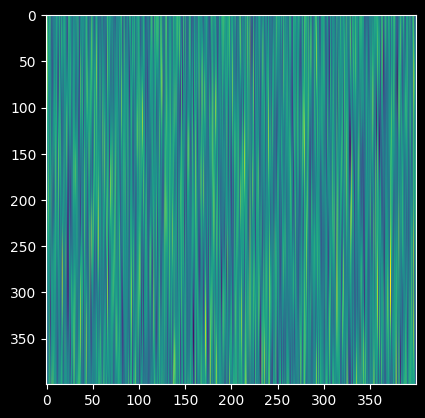

In [255]:
plt.imshow(activity)
plt.show()

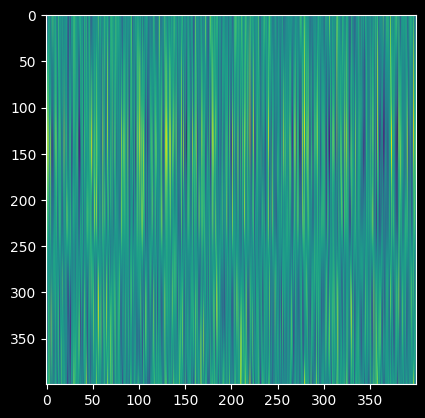

In [256]:
dot_products = activity @ activity

plt.imshow(dot_products)
plt.show()

In [257]:
dot_products = dot_products - dot_products.min()
dot_products /= dot_products.max()

In [258]:
def embd(low_dim, distances, dt = 0.0001, epochs = 100):
    N = distances.shape[0]
    distances = add_axi(distances)
    x = np.random.uniform(-1, 1, (N, low_dim))
    for e in range(epochs):
        vectors = get_diff_matrix(x, x)
        lenghts = add_axi((vectors**2).sum(-1)**0.5) + 0.0001
        #lenghts = distances - add_axi((vectors**2).sum(-1)**0.5)
        x += (distances*vectors/lenghts - vectors).sum(0)*dt
        if e % 10 == 0:
            print(f"{e}_energy: ",(lenghts**2).mean())

    return x

In [259]:
q = embd(400, dot_products, epochs = 200)
q

0_energy:  265.7767375175071
10_energy:  121.28751612741851
20_energy:  56.19710311216449
30_energy:  26.61205848746646
40_energy:  12.993673038823376
50_energy:  6.614246696739032
60_energy:  3.5552592577190474
70_energy:  2.04425950177403
80_energy:  1.270921766230899
90_energy:  0.8591897821680828
100_energy:  0.630938533513374
110_energy:  0.4995048807189982
120_energy:  0.4212976199659772
130_energy:  0.3735274250389652
140_energy:  0.34377753289707697
150_energy:  0.3250029177346938
160_energy:  0.3130580617480324
170_energy:  0.3054287346149168
180_energy:  0.3005539917871287
190_energy:  0.2974481035213681


array([[-0.00047541,  0.00170767,  0.01423313, ...,  0.02031056,
        -0.01376973,  0.0379138 ],
       [-0.0398335 , -0.00780584,  0.0144751 , ..., -0.01315151,
        -0.03006024,  0.02453554],
       [-0.04576133,  0.0026486 , -0.00992919, ..., -0.02954857,
         0.02602616, -0.02431735],
       ...,
       [-0.00506292,  0.02154177,  0.01910539, ..., -0.00708955,
        -0.02332688, -0.00053126],
       [-0.00337659,  0.01153378, -0.04902465, ...,  0.03007686,
        -0.03113774, -0.00234341],
       [-0.00387794, -0.01315296, -0.0103546 , ..., -0.01164992,
         0.00889118,  0.04222768]])

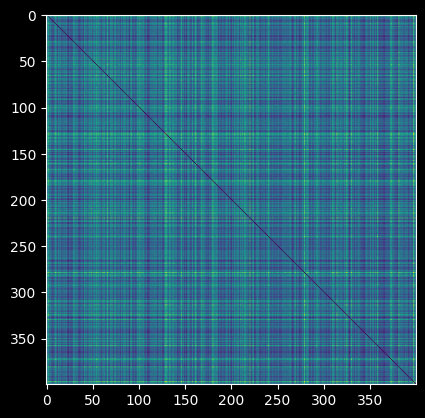

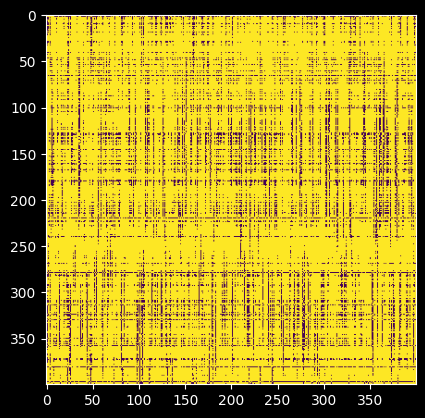

In [260]:
g = get_diff_matrix(q, q)
plt.imshow((g**2).sum(-1))
plt.show()

plt.imshow(np.abs((g**2).sum(-1) - dot_products) > 0.1)
plt.show()